### Import Libraries

In [123]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Read Data

In [124]:
apps = pd.read_csv(os.getcwd()+"/Dataset/appstore_games.csv")

### Data Cleansing

In [125]:
# head of dataset

apps.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [126]:
# shape of the dataset

apps.shape

(17007, 18)

In [127]:
# dropping unused columns

apps.drop(columns=["URL" ,"Subtitle", "Icon URL", "Description"], inplace=True)

In [128]:
apps.shape

(17007, 14)

#### Check data type

In [129]:
# data types

apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            17007 non-null  int64  
 1   Name                          17007 non-null  object 
 2   Average User Rating           7561 non-null   float64
 3   User Rating Count             7561 non-null   float64
 4   Price                         16983 non-null  float64
 5   In-app Purchases              7683 non-null   object 
 6   Developer                     17007 non-null  object 
 7   Age Rating                    17007 non-null  object 
 8   Languages                     16947 non-null  object 
 9   Size                          17006 non-null  float64
 10  Primary Genre                 17007 non-null  object 
 11  Genres                        17007 non-null  object 
 12  Original Release Date         17007 non-null  object 
 13  C

In [130]:
# Change Original Release Date & Current Version Release Date into a datetime column

apps["Original Release Date"] = pd.to_datetime(apps["Original Release Date"])
apps["Current Version Release Date"] = pd.to_datetime(apps["Current Version Release Date"])

In [131]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            17007 non-null  int64         
 1   Name                          17007 non-null  object        
 2   Average User Rating           7561 non-null   float64       
 3   User Rating Count             7561 non-null   float64       
 4   Price                         16983 non-null  float64       
 5   In-app Purchases              7683 non-null   object        
 6   Developer                     17007 non-null  object        
 7   Age Rating                    17007 non-null  object        
 8   Languages                     16947 non-null  object        
 9   Size                          17006 non-null  float64       
 10  Primary Genre                 17007 non-null  object        
 11  Genres                      

#### delete data duplicated

In [132]:
duplicate = apps.duplicated()
duplicate.sum()

160

In [133]:
# delete data duplicated

apps.drop_duplicates(inplace=True)

duplicate = apps.duplicated()
duplicate.sum()

0

#### Imputation

In [134]:
apps.isnull().sum()

ID                                 0
Name                               0
Average User Rating             9359
User Rating Count               9359
Price                             24
In-app Purchases                9232
Developer                          0
Age Rating                         0
Languages                         60
Size                               1
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

In [135]:
# number of In-app Purchases

In_app_Purchases_before = apps["In-app Purchases"].notnull().sum()
In_app_Purchases_before

7615

In [136]:
# transform In-app Purchases column
# mesk will replace values where the condition is True.

apps["In-app Purchases"].mask(apps["In-app Purchases"].notnull(), "Yes", inplace=True)
apps["In-app Purchases"].mask(apps["In-app Purchases"].isnull(), "No", inplace=True)
        

In [137]:
# checking number of In-app Purchases

apps["In-app Purchases"].value_counts()

No     9232
Yes    7615
Name: In-app Purchases, dtype: int64

In [138]:
# fill null values in Average User Rating and User Rating Count with 0

apps["Average User Rating"] = apps["Average User Rating"].fillna(0)
apps["User Rating Count"] = apps["User Rating Count"].fillna(0)

In [139]:
# fill null values in Price with 0

apps["Price"] = apps["Price"].fillna(0)

In [140]:
# fill null values in Languages with Unknown

apps["Languages"] = apps["Languages"].fillna("Unknown")

In [141]:
# fill a null value in Size with average size from others in the same Genres 

apps["Size"] = apps["Size"].fillna(apps["Size"][apps["Genres"] == "Games, Strategy, Simulation"].mean())

In [142]:
apps.isnull().sum()

ID                              0
Name                            0
Average User Rating             0
User Rating Count               0
Price                           0
In-app Purchases                0
Developer                       0
Age Rating                      0
Languages                       0
Size                            0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
dtype: int64

### Selecting KPIs

In [143]:
# count number of languages 

def get_num_lang(cols) :
    num_lang_list = []
    for col in cols :
        lang = col.split(", ")
        num = len(lang)
        num_lang_list.append(num)
    return(num_lang_list)

apps["num_Languages"] = get_num_lang(apps["Languages"])

In [144]:
# days from Release Date until the last update

apps["Recency"] = apps["Current Version Release Date"] - apps["Original Release Date"]
apps["Recency"] = apps["Recency"].apply(lambda x : x.days)

apps["Recency"] = apps["Recency"].mask(apps["Recency"] < 0, apps["Recency"]*-1)
apps[apps["Recency"] < 0]

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,num_Languages,Recency


In [145]:
list_KPIs = ['Average User Rating', 'User Rating Count', 'num_Languages', "Recency"]

In [146]:
apps[list_KPIs]

,Average User Rating,User Rating Count,num_Languages,Recency
0,4.0,3553.0,17,3126
1,3.5,284.0,1,3478
2,3.0,8376.0,1,3105
3,3.5,190394.0,17,3233
4,3.5,28.0,15,3656
...,...,...,...,...
17002,0.0,0.0,1,0
17003,0.0,0.0,1,0
17004,0.0,0.0,1,0
17005,0.0,0.0,1,0


In [147]:
apps[list_KPIs].corr().style.background_gradient()

,Average User Rating,User Rating Count,num_Languages,Recency
Average User Rating,1.000000,0.064012,0.084197,0.340560
User Rating Count,0.064012,1.000000,0.061278,0.088234
num_Languages,0.084197,0.061278,1.000000,0.096880
Recency,0.340560,0.088234,0.096880,1.000000


In [148]:
apps[list_KPIs].describe().T

,count,mean,std,min,25%,50%,75%,max
Average User Rating,16847.0,1.805485,2.079630,0.0,0.0,0.0,4.0,5.0
User Rating Count,16847.0,1469.529352,28391.222431,0.0,0.0,0.0,31.0,3032734.0
num_Languages,16847.0,3.254229,6.165888,1.0,1.0,1.0,2.0,111.0
Recency,16847.0,431.448745,682.121803,0.0,0.0,93.0,580.0,4086.0


### Normalization KPIs

x_norm = (x_i - x_min) / (x_max - x_min)

In [149]:
def normalization(vals):
    new_vals = []
    max_val = max(vals)
    min_val = min(vals)
    for val in vals:
        val_norm = (val-min_val)/(max_val-min_val)
        new_vals.append(val_norm)
    return new_vals

In [150]:
for col in list_KPIs:
    apps[col + "_Norm"] = normalization(apps[col])

In [151]:
apps.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,16847.0,1.059651e+09,2.999351e+08,284921427.0,899654330.0,1.112429e+09,1.286958e+09,1.475077e+09
Average User Rating,16847.0,1.805485e+00,2.079630e+00,0.0,0.0,0.000000e+00,4.000000e+00,5.000000e+00
User Rating Count,16847.0,1.469529e+03,2.839122e+04,0.0,0.0,0.000000e+00,3.100000e+01,3.032734e+06
Price,16847.0,8.141871e-01,7.865709e+00,0.0,0.0,0.000000e+00,0.000000e+00,1.799900e+02
Size,16847.0,1.158200e+08,2.043155e+08,51328.0,22950400.0,5.674701e+07,1.329777e+08,4.005591e+09
num_Languages,16847.0,3.254229e+00,6.165888e+00,1.0,1.0,1.000000e+00,2.000000e+00,1.110000e+02
Recency,16847.0,4.314487e+02,6.821218e+02,0.0,0.0,9.300000e+01,5.800000e+02,4.086000e+03
Average User Rating_Norm,16847.0,3.610969e-01,4.159259e-01,0.0,0.0,0.000000e+00,8.000000e-01,1.000000e+00
User Rating Count_Norm,16847.0,4.845560e-04,9.361593e-03,0.0,0.0,0.000000e+00,1.022180e-05,1.000000e+00
num_Languages_Norm,16847.0,2.049299e-02,5.605353e-02,0.0,0.0,0.000000e+00,9.090909e-03,1.000000e+00


In [152]:
list_KPIs_norm = ["Average User Rating_Norm", "User Rating Count_Norm", "num_Languages_Norm", "Recency_Norm"]

### Create Score

In [153]:
apps["Score"] = apps[list_KPIs_norm].mean(axis=1)

<AxesSubplot:xlabel='Score', ylabel='Count'>

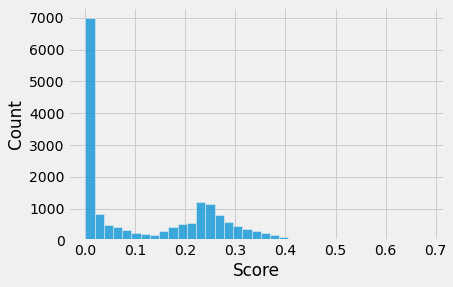

In [154]:
sns.histplot(apps["Score"])

/Users/pakkapon/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score'>

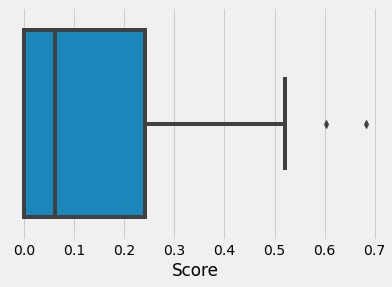

In [155]:
sns.boxplot(apps["Score"])

### Sort Score

In [156]:
top_10_pop_games = apps.sort_values(by="Score", ascending=False)[:10]

In [157]:
top_10_pop_games.to_csv(os.getcwd()+"/output/top_10_pop_games", index=False)

### Machine Learning Predictive KPIs Score with Logit Model

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [159]:
x = apps[list_KPIs]
y = apps["Score"]

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75)


In [161]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [162]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [163]:
y_predict = reg.predict(x_test)

print("MAE =" , metrics.mean_absolute_error(y_test , y_predict))
print("MSE =" , metrics.mean_squared_error(y_test , y_predict))
print("RMSE =" , np.sqrt(metrics.mean_squared_error(y_test , y_predict)))
print("r2_score =", metrics.r2_score(y_test , y_predict))
print("intercept =", reg.intercept_)
print("coef. ", reg.coef_)

MAE = 3.6270609894416474e-15
MSE = 2.9733320623416004e-29
RMSE = 5.452826847004772e-15
r2_score = 1.0
intercept = -0.0022727272727307984
coef.  [5.00000000e-02 8.24338699e-08 2.27272727e-03 6.11845326e-05]
